<a href="https://colab.research.google.com/github/lytcool369/tensorflow2.0/blob/master/03_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_2_0_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 균일분포와 정규분포의 차이

In [ ]:
# 3.7 난수 얻기(균일 분포)
import tensorflow as tf
import matplotlib.pyplot as plt

rand = tf.random.uniform([1], 0, 1)
print(rand)

tf.Tensor([0.7353165], shape=(1,), dtype=float32)


In [ ]:
# 3.8 난수 여러개 얻기 (균일 분포)
rand = tf.random.uniform([4], 0, 1)
print(rand)

tf.Tensor([0.42317748 0.69271445 0.41266823 0.5442978 ], shape=(4,), dtype=float32)


In [ ]:
# 3.9 난수 여러개 얻기 (정규 분포)
rand = tf.random.normal([4], 0, 1)
print(rand)

tf.Tensor([ 0.5251804 -0.537773  -1.2567564 -0.9572656], shape=(4,), dtype=float32)


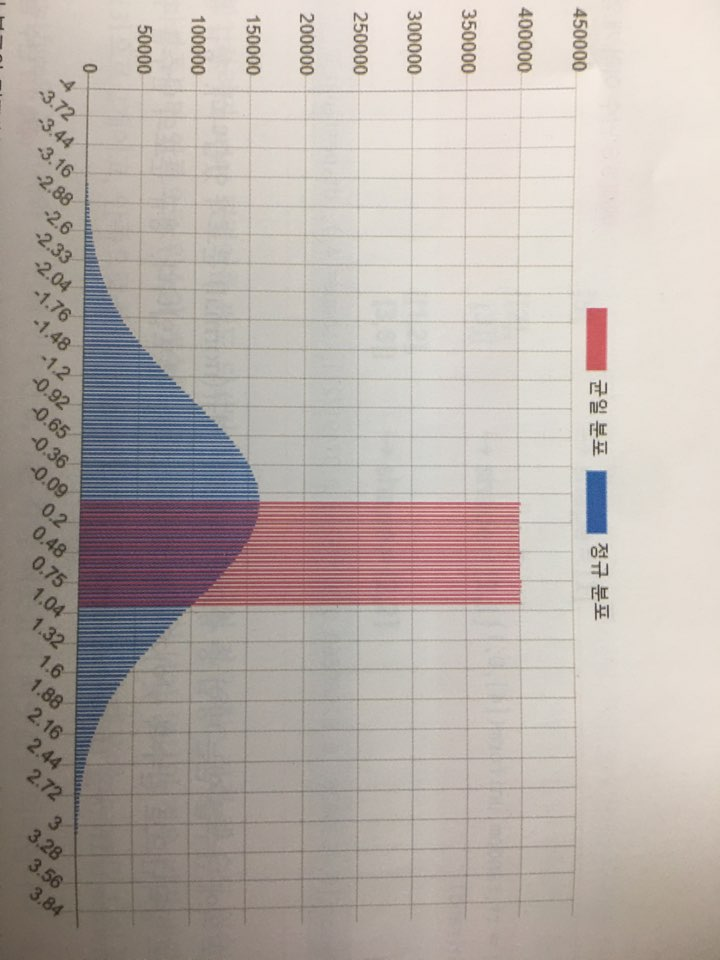

- 균일 분포 : 최솟값과 최댓값 사이에서 일정한 확률의 난수
- 정규 분포 : 주어진 평균과 표준편차를 만족하는 종형 곡선(bell curve)

# 뉴런 만들기

In [ ]:
# 3.10 시그모이드 함수
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
print(output)

0.34597366229057075


실제 출력으로 나온 0.345973 과 기대출력인 0의 차이인
`0 - 0.345973 = -0.345973`을 에러(error)라고 한다.

## 경사 하강법
뉴런이란 결국 w값이다. w에 입력과 학습률(a)과 에러를 곱한 값을 더해주는 것을 경사 하강법(Gradient Descent)라고 한다.\
`w = w + x * a * error`\
학습률은 w를 업데이트 하는 정도로,\
큰 값으로 설정하면 학습이 빨리 되지만 과도한 학습으로 적정한 수치를 벗어날 우려가 있고,\
너무 작은 값으로 설정하면 학습 속도가 너무 느려질 수 있다.


In [25]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
x = 1
y = 0
w = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i, error, output))

99	-0.09825320382599824	0.09825320382599824
199	-0.05125863042369237	0.05125863042369237
299	-0.03435123861706607	0.03435123861706607
399	-0.025754247195932153	0.025754247195932153
499	-0.020571994697434284	0.020571994697434284
599	-0.01711408126464691	0.01711408126464691
699	-0.01464535333416731	0.01464535333416731
799	-0.012795722287923623	0.012795722287923623
899	-0.011358913199853816	0.011358913199853816
999	-0.010210943288154391	0.010210943288154391


In [26]:
# 3.13 x=0, y=1일 때, y=1을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i, error, output))

99	0.5	0.5
199	0.5	0.5
299	0.5	0.5
399	0.5	0.5
499	0.5	0.5
599	0.5	0.5
699	0.5	0.5
799	0.5	0.5
899	0.5	0.5
999	0.5	0.5


x=0 이기 때문에 값이 변하지 않는다.\
이것을 방지하지 위해 편향(bias)을 뉴런에 넣어준다.

In [24]:
# 3.14 x=0, y=1일 때, 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x * w + 1 * b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i, error, output))

99	0.10486225077269973	0.8951377492273003
199	0.05309641928249731	0.9469035807175027
299	0.03518159368794538	0.9648184063120546
399	0.02622227176335401	0.973777728236646
499	0.0208710812774473	0.9791289187225527
599	0.017321290440019177	0.9826787095599808
699	0.014797227474598884	0.9852027725254011
799	0.01291176742859923	0.9870882325714008
899	0.011450425532903541	0.9885495744670965
999	0.01028491263675746	0.9897150873632425
